
# TSP Dynamic Programming

This notebook explores Dynamic Programming aproache for solving the Traveling Salesman Problem:

The aim is to observe the execution times and solution quality for this method.

# Setup and Imports

This section imports the necessary libraries:

- `numpy` for matrix operations and random generation
- `itertools` for handling subsets in DP
- `matplotlib` for plotting
- `gurobipy` for solving TSP using branch-and-cut


First, we import the necessary libraries:
Explanation: Here, we use numpy for matrix operations and random number generation, itertools for combinations in subsets, and gurobipy for solving the TSP with a branch-and-cut approach.


In [9]:
# Import necessary libraries
import numpy as np
import itertools
import time
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum

# Graph and Problem Definition

Here, we define the graph, including the depot, customers, and cost matrix for TSP.

This function generates a random cost matrix with the depot and customer nodes included.

Define the graph, including the depot, customers, and the cost matrix:
Explanation: This function generates a random cost matrix for a TSP instance, where num_nodes includes the depot and customers.

In [ ]:
#Define una matrix simetrica

"""
def generate_tsp_instance(num_nodes, seed=None):
    np.random.seed(seed)
    costs = np.random.randint(1, 100, size=(num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            costs[j, i] = costs[i, j]
    
    np.fill_diagonal(costs, 0)
    
    return costs
    """

Let's instantiate our cost matrix

In [11]:
import pandas as pd

num_nodes = 4
seed = 42
cost_matrix = generate_tsp_instance(num_nodes, seed=seed)
pd.DataFrame(cost_matrix).head()

,0,1,2,3
0,0,93,15,72
1,61,0,83,87
2,75,75,0,24
3,3,22,53,0


Show data as a Graph

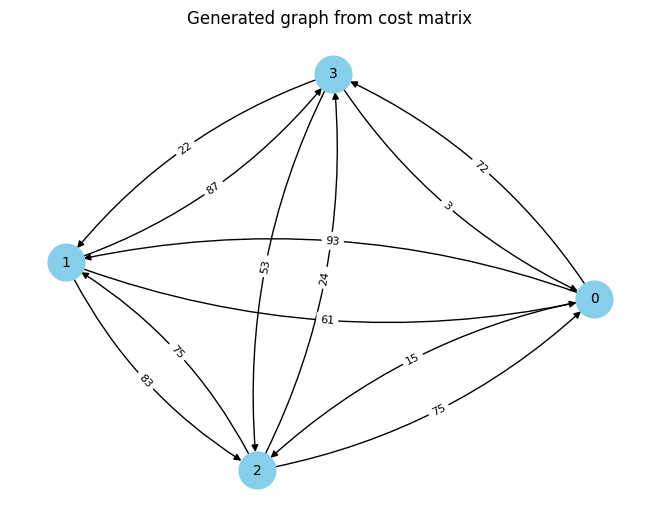

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

# Creation of the graph
G = nx.MultiDiGraph()

# Add nodes, arists and weights
num_nodos = len(cost_matrix)
for i in range(num_nodos):
    for j in range(i + 1, num_nodos):  
        if cost_matrix[i][j] != 0:  
            # Add both directions with the same weight (if it doesn't exist already)
            G.add_edge(i, j, weight=cost_matrix[i][j])
            G.add_edge(j, i, weight=cost_matrix[j][i])  # Ensure bidirectional edges

# Get the positions for nodes
pos = nx.spring_layout(G)  

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=700, font_size=10,  connectionstyle="arc3, rad = 0.15")

# Add weight label to edges (both directions)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, font_color="black",  connectionstyle="arc3, rad = 0.15")

# Show the graph
plt.title("Generated graph from cost matrix")
plt.show()


# Dynamic Programming Solution

We implement a recursive DP function with memoization to solve the TSP optimally.

- **H(X, i)**: Computes the minimum cost from the depot to node `i`, passing through a subset `X` of nodes.
- **Base case**: Costs from the depot.

This will help us get optimal solutions for small to moderately-sized TSP instances.

Implement the recursive relation with memoization:

In [197]:
costs = cost_matrix

# Define the DP-based TSP solver with memoization
num_nodes = len(costs)
# Memoization dictionary for storing computed values of H(X, i)
memo = {}

Let's calculate the cost from depot to any node, and save it in a dictionary

In [198]:
for i in range(1, num_nodes):
    memo[(frozenset(), i)] = costs[0][i]

for key, value in memo.items():
    print(f"Cost to reach node {key[1]}: {value}")

Cost to reach node 1: 93
Cost to reach node 2: 15
Cost to reach node 3: 72


Recursive function to compute H(X, i)

$$H(X, i) = \min_{j \in X} \left\{ H(X \setminus \{j\}, j) + c_{ji} \right\}$$

In [199]:


def H(X, i):
    # If result is already computed, return it
    if (X, i) in memo:
        return memo[(X, i)]
    
    # Compute minimum cost to reach i from any j in X
    min_cost = float('inf')
    for j in X:
        remaining = X - {j}
        cost = H(remaining, j) + costs[j][i]
        if cost < min_cost:
            min_cost = cost

    memo[(X, i)] = min_cost
    return min_cost


In [201]:
# Compute minimum tour cost from the depot back to depot
full_set = frozenset(range(1, num_nodes))
full_set = full_set - {3} #node de salida
print(full_set)

print(full_set)
min_tour_cost = min(H(full_set - {j}, j) + costs[j][3] for j in full_set)
print(memo)
print(min_tour_cost)

frozenset({1, 2})
frozenset({1, 2})
{(frozenset(), 1): np.int32(93), (frozenset(), 2): np.int32(15), (frozenset(), 3): np.int32(72), (frozenset({3}), 2): np.int32(96), (frozenset({2}), 3): np.int32(39), (frozenset({2, 3}), 1): np.int32(126), (frozenset({3}), 1): np.int32(159), (frozenset({1}), 3): np.int32(180), (frozenset({1, 3}), 2): np.int32(204), (frozenset({2}), 1): np.int32(98), (frozenset({1}), 2): np.int32(176), (frozenset({1, 2}), 3): np.int32(185)}
185


In [200]:

# Compute minimum tour cost from the depot back to depot
full_set = frozenset(range(1, num_nodes))


print(full_set)
min_tour_cost = min(H(full_set - {j}, j) + costs[j][0] for j in full_set)
print(memo)
print(min_tour_cost)

frozenset({1, 2, 3})
{(frozenset(), 1): np.int32(93), (frozenset(), 2): np.int32(15), (frozenset(), 3): np.int32(72), (frozenset({3}), 2): np.int32(96), (frozenset({2}), 3): np.int32(39), (frozenset({2, 3}), 1): np.int32(126), (frozenset({3}), 1): np.int32(159), (frozenset({1}), 3): np.int32(180), (frozenset({1, 3}), 2): np.int32(204), (frozenset({2}), 1): np.int32(98), (frozenset({1}), 2): np.int32(176), (frozenset({1, 2}), 3): np.int32(185)}
219


Explanation:

H(X, i) calculates the minimum path cost to reach node 
i
i while visiting all nodes in subset
X
X.
memo stores values of 
H
(
X
,
i
)
H(X,i) for previously computed subsets to avoid redundant calculations (dynamic programming with memoization).


In [4]:

def solve_tsp_gurobi(cost_matrix):
    num_nodes = len(cost_matrix)
    model = Model()
    x = model.addVars(num_nodes, num_nodes, vtype=GRB.BINARY, name="x")
    model.setObjective(quicksum(cost_matrix[i][j] * x[i, j] for i in range(num_nodes) for j in range(num_nodes)), GRB.MINIMIZE)
    model.addConstrs(quicksum(x[i, j] for j in range(num_nodes) if j != i) == 1 for i in range(num_nodes))
    model.addConstrs(quicksum(x[i, j] for i in range(num_nodes) if i != j) == 1 for j in range(num_nodes))
    model.optimize()
    return model.objVal, model.Runtime


Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-23
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 16 rows, 64 columns and 112 nonzeros
Model fingerprint: 0x689c34eb
Variable types: 0 continuous, 64 integer (64 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 396.0000000
Presolve removed 0 rows and 8 columns
Presolve time: 0.02s
Presolved: 16 rows, 56 columns, 112 nonzeros
Variable types: 0 continuous, 56 integer (56 binary)

Root relaxation: objective 1.560000e+02, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

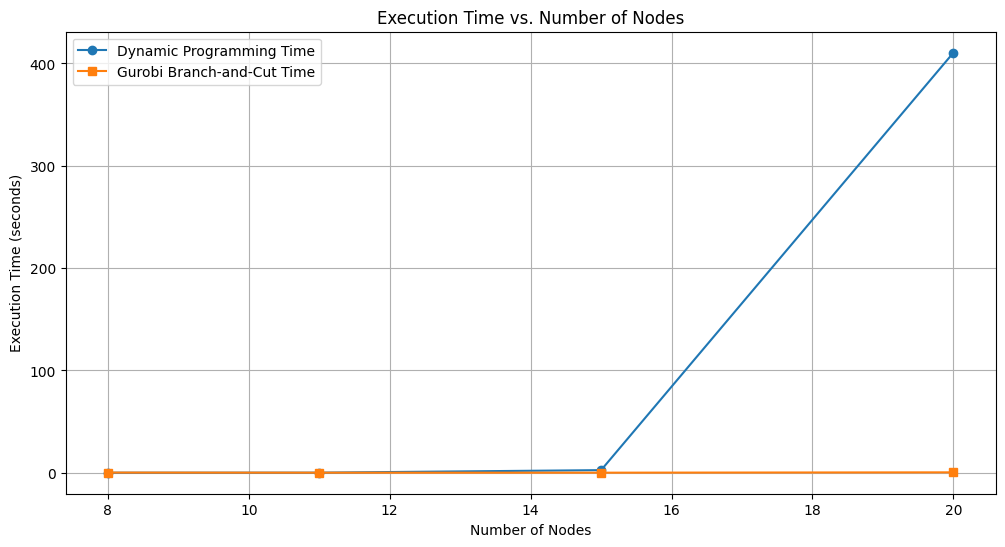

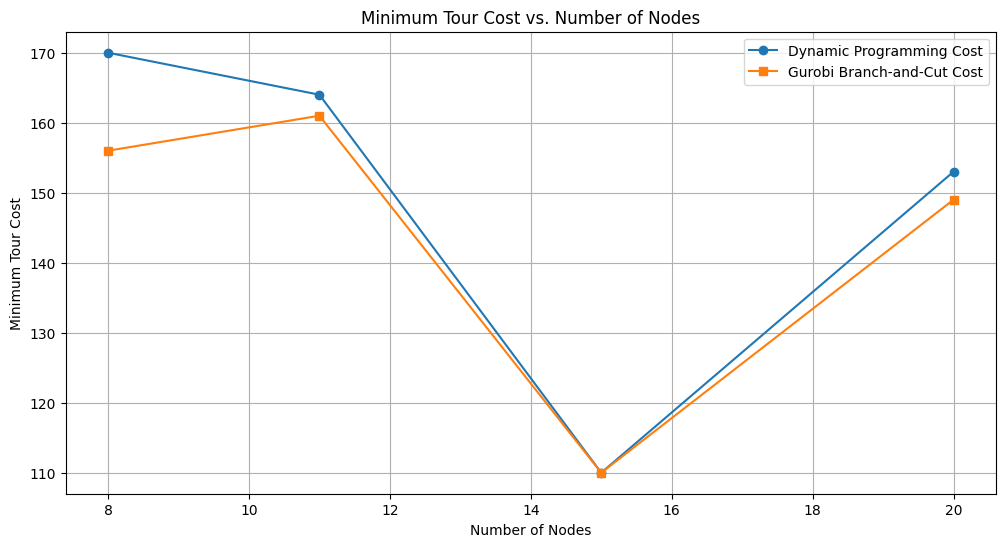

NameError: name 'pd' is not defined

In [5]:
# Function to generate a TSP cost matrix instance
def compare_algorithms(num_nodes_list, seed=42):
    dp_times = []
    gurobi_times = []
    dp_costs = []
    gurobi_costs = []

    for num_nodes in num_nodes_list:
        cost_matrix = generate_tsp_instance(num_nodes, seed=seed)

        # Dynamic Programming
        start_time = time.time()
        dp_cost = tsp_dynamic_programming(cost_matrix)
        dp_time = time.time() - start_time
        dp_times.append(dp_time)
        dp_costs.append(dp_cost)

        # Gurobi Branch-and-Cut
        gurobi_cost, gurobi_time = solve_tsp_gurobi(cost_matrix)
        gurobi_times.append(gurobi_time)
        gurobi_costs.append(gurobi_cost)
    
    return dp_times, gurobi_times, dp_costs, gurobi_costs

# Instance sizes to test
num_nodes_list = [8,11,15,20]

# Run comparison
dp_times, gurobi_times, dp_costs, gurobi_costs = compare_algorithms(num_nodes_list)

# Plot Execution Time Comparison
plt.figure(figsize=(12, 6))
plt.plot(num_nodes_list, dp_times, label="Dynamic Programming Time", marker='o')
plt.plot(num_nodes_list, gurobi_times, label="Gurobi Branch-and-Cut Time", marker='s')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs. Number of Nodes")
plt.legend()
plt.grid(True)
plt.show()

# Plot Cost Comparison
plt.figure(figsize=(12, 6))
plt.plot(num_nodes_list, dp_costs, label="Dynamic Programming Cost", marker='o')
plt.plot(num_nodes_list, gurobi_costs, label="Gurobi Branch-and-Cut Cost", marker='s')
plt.xlabel("Number of Nodes")
plt.ylabel("Minimum Tour Cost")
plt.title("Minimum Tour Cost vs. Number of Nodes")
plt.legend()
plt.grid(True)
plt.show()

# Convert results to DataFrame for easy viewing and plotting
results_df = pd.DataFrame(results)
results_df